<h1><b>ANÁLISIS DEL CONSUMO ELÉCTRICO<b></h1>

In [87]:
# Importamos las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

sns.set_style(style='darkgrid')

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [88]:
# Carga de datos
data = pd.read_csv('source/data/clean_data.csv')
data.head()

,Hour,Minute,Day,Weekday,Month,Year,Quarter,Season,ND,TDS,...,Embedded_Solar_Generation,Embedded_Solar_Capacity,Non_BMSTOR,Pump_Storage_Pumping,IFA,IFA2,Britned,Moyle,East_West,Nemo
0,0,30,1,Thursday,1,2009,1,Winter,37910,794,...,0,0,0,33,2002,0,0,-161,0,0
1,1,0,1,Thursday,1,2009,1,Winter,38047,917,...,0,0,0,157,2002,0,0,-160,0,0
2,1,30,1,Thursday,1,2009,1,Winter,37380,1271,...,0,0,0,511,2002,0,0,-160,0,0
3,2,0,1,Thursday,1,2009,1,Winter,36426,1349,...,0,0,0,589,1772,0,0,-160,0,0
4,2,30,1,Thursday,1,2009,1,Winter,35687,1611,...,0,0,0,851,1753,0,0,-160,0,0


### **Información general**

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242756 entries, 0 to 242755
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Hour                       242756 non-null  int64 
 1   Minute                     242756 non-null  int64 
 2   Day                        242756 non-null  int64 
 3   Weekday                    242756 non-null  object
 4   Month                      242756 non-null  int64 
 5   Year                       242756 non-null  int64 
 6   Quarter                    242756 non-null  int64 
 7   Season                     242084 non-null  object
 8   ND                         242756 non-null  int64 
 9   TDS                        242756 non-null  int64 
 10  England_Wales_Demand       242756 non-null  int64 
 11  Embedded_Wind_Generation   242756 non-null  int64 
 12  Embedded_Wind_Capacity     242756 non-null  int64 
 13  Embedded_Solar_Generation  242756 non-null  

In [90]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hour,242756.0,11.500000,6.921498,0.0,6.0,11.5,17.0,23.0
Minute,242756.0,15.000000,15.000031,0.0,0.0,15.0,30.0,30.0
Day,242756.0,15.712106,8.804010,1.0,8.0,16.0,23.0,31.0
Month,242756.0,6.468965,3.426387,1.0,4.0,6.0,9.0,12.0
Year,242756.0,2015.429608,3.994896,2009.0,2012.0,2015.0,2019.0,2022.0
Quarter,242756.0,2.492659,1.112109,1.0,2.0,2.0,3.0,4.0
ND,242756.0,31917.732064,7799.903081,13367.0,25691.0,31343.0,37677.0,59095.0
TDS,242756.0,1359.982003,1773.724706,-41122.0,759.0,1127.0,1896.0,7762.0
England_Wales_Demand,242756.0,29026.774065,7073.852421,0.0,23354.0,28480.0,34291.0,53325.0
Embedded_Wind_Generation,242756.0,1187.206339,912.142942,0.0,509.0,949.0,1609.0,5354.0


<br></br>
## **Consumo por hora**

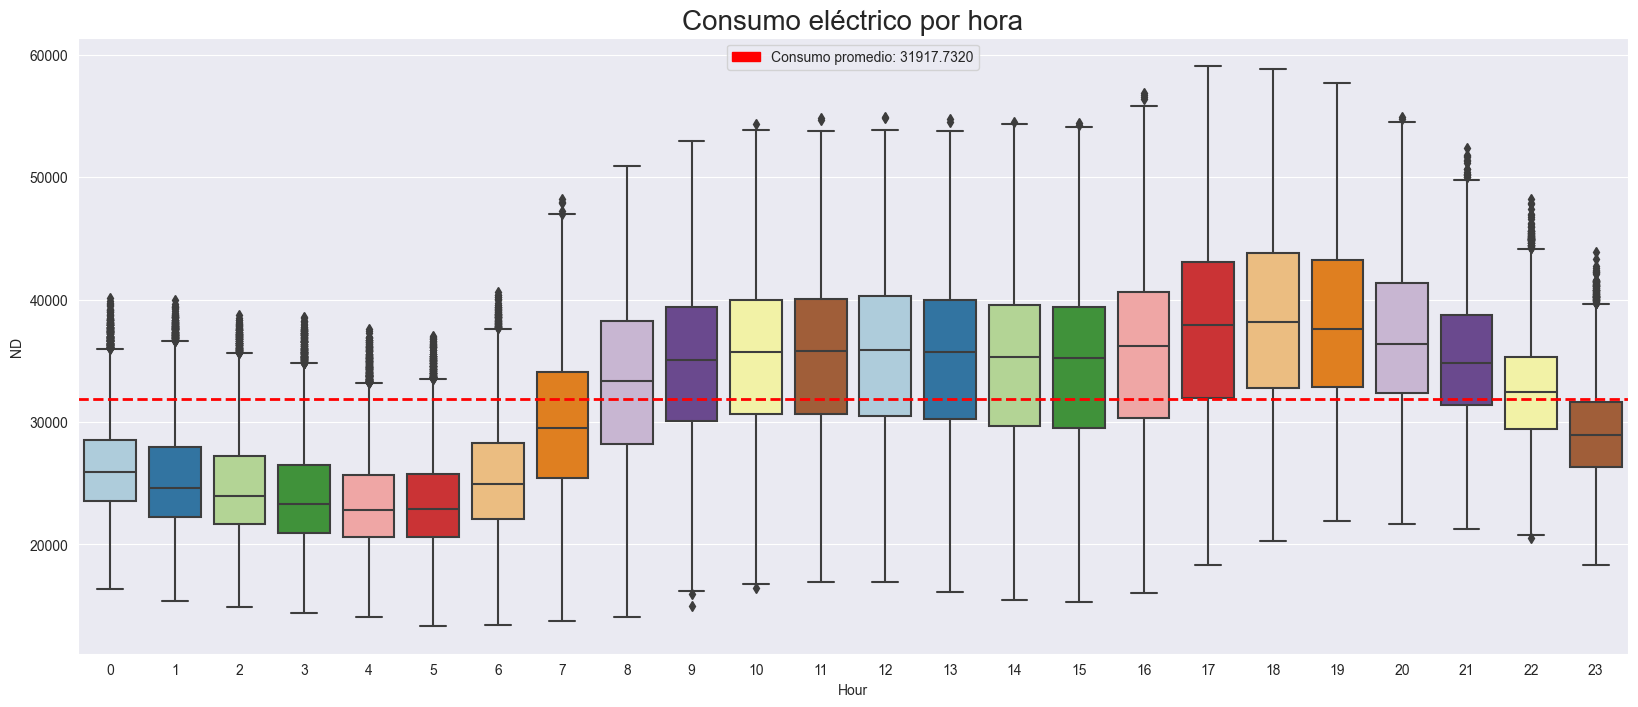

In [91]:
plt.figure(figsize=(20,8))
sns.boxplot(data=data, x='Hour', y='ND', palette='Paired')
nd_mean = data.ND.mean()    # Cálculo de la media
plt.axhline(nd_mean, color='red', linestyle='--', linewidth=2)
red_patch = mpatches.Patch(color='red', label='Consumo promedio: 31917.7320')
plt.legend(handles=[red_patch], loc='upper center')
plt.title('Consumo eléctrico por hora', fontsize=20)
plt.show()

- En el rango horario (23:00 - 07:00) se reduce el consumo por debajo de la media. Tiene sentido ya que es un horario nocturno.
- Caso contrario, en el siguiente rango (08:00 - 22:00) el consumo se encuentra por encima de esa media.
- En ciertos momentos hay un consumo elevado que superan la media y los bigotes de los boxplots. Se ve mucho en horarios nocturnos donde se podría dar el caso de que no todos reducen su consumo sino mas bien lo incrementan.

<br></br>
## **Consumo por día**

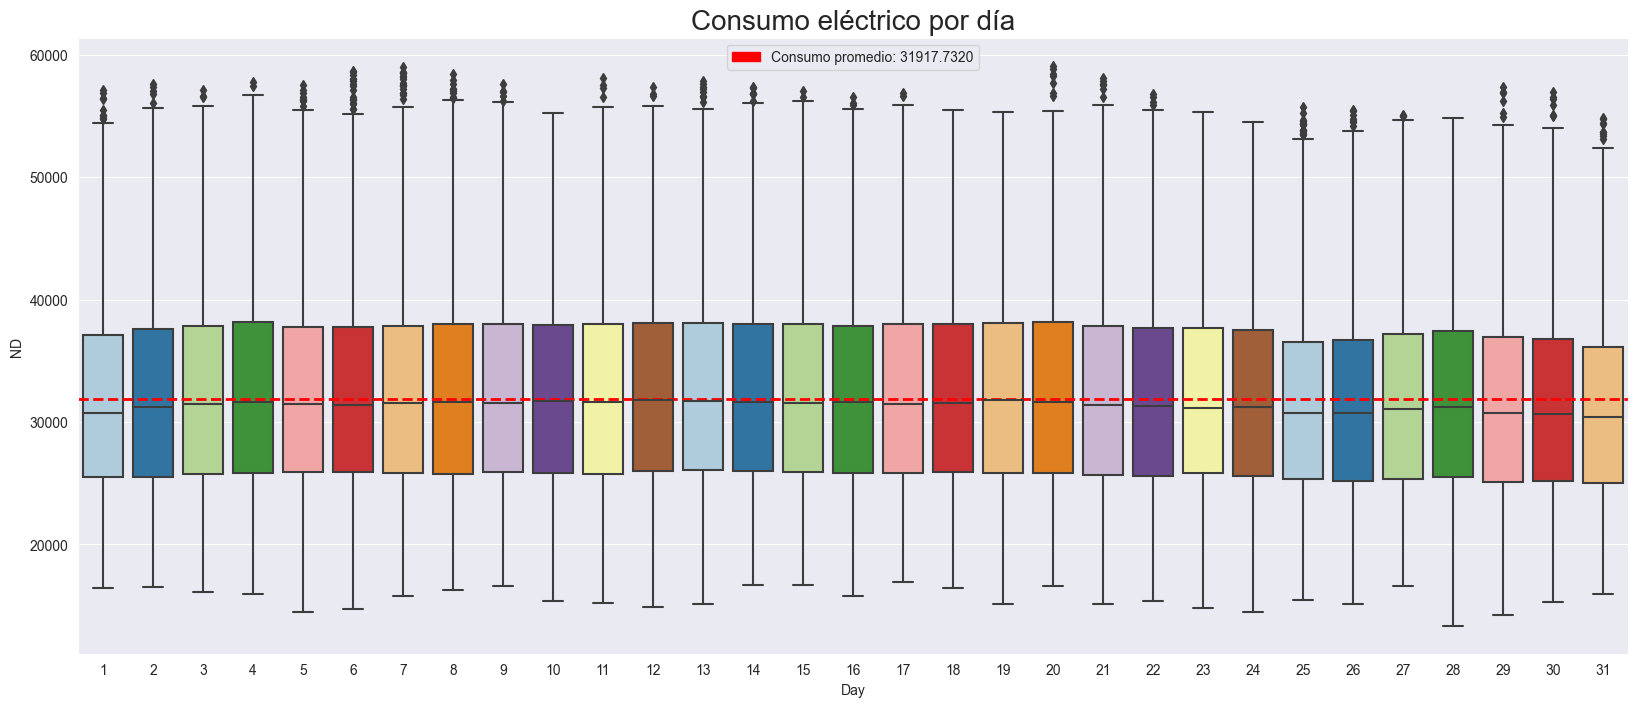

In [92]:
plt.figure(figsize=(20,8))
sns.boxplot(data=data, x='Day', y='ND', palette='Paired')
plt.axhline(nd_mean, color='red', linestyle='--', linewidth=2)
red_patch = mpatches.Patch(color='red', label='Consumo promedio: 31917.7320')
plt.legend(handles=[red_patch], loc='upper center')
plt.title('Consumo eléctrico por día', fontsize=20)
plt.show()

- Visualizamos que el consumo diario es relativamente regular, decimos relativamente ya que hay valores fuera de rango, que apesar de no tiener efecto en el análisis, es importante destacarlos y analizarlos.
- A simple vista existe un fuerte consumo a inicio de cada mes, pero a final de mes se reduce. Una posible razón de la disminución del consumo puede ser el ahorro de energía.

<br></br>
## **Consumo por mes**

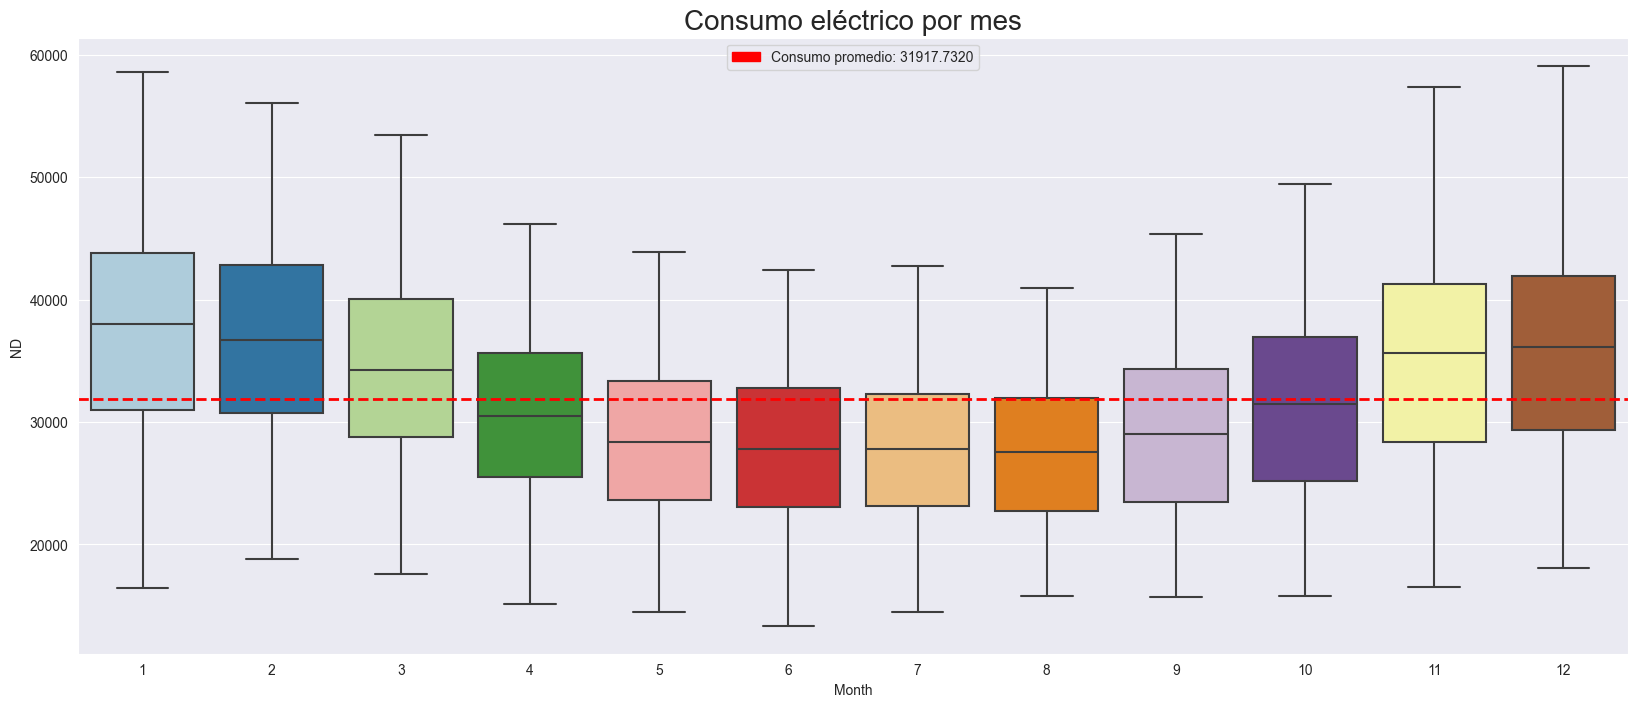

In [93]:
plt.figure(figsize=(20,8))
sns.boxplot(data=data, x='Month', y='ND', palette='Paired')
plt.axhline(nd_mean, color='red', linestyle='--', linewidth=2)
red_patch = mpatches.Patch(color='red', label='Consumo promedio: 31917.7320')
plt.legend(handles=[red_patch], loc='upper center')
plt.title('Consumo eléctrico por mes', fontsize=20)
plt.show()

In [94]:
for i in range(12):
    print('Mediana mes ',i+1, 'es: ',data[data['Month']==i+1].ND.median())
    print('Media de consumo en el mes ',i+1, 'es: ',data[data['Month']==i+1].ND.mean())

Mediana mes  1 es:  37987.5
Media de consumo en el mes  1 es:  37595.68437980031
Mediana mes  2 es:  36671.0
Media de consumo en el mes  2 es:  36795.96065400844
Mediana mes  3 es:  34222.5
Media de consumo en el mes  3 es:  34451.24495289368
Mediana mes  4 es:  30465.5
Media de consumo en el mes  4 es:  30710.568601190476
Mediana mes  5 es:  28393.5
Media de consumo en el mes  5 es:  28811.553235407067
Mediana mes  6 es:  27803.0
Media de consumo en el mes  6 es:  28167.618353174603
Mediana mes  7 es:  27813.5
Media de consumo en el mes  7 es:  28089.69580453149
Mediana mes  8 es:  27540.0
Media de consumo en el mes  8 es:  27741.082469278033
Mediana mes  9 es:  29058.5
Media de consumo en el mes  9 es:  29177.457837301587
Mediana mes  10 es:  31472.0
Media de consumo en el mes  10 es:  31248.71942204301
Mediana mes  11 es:  35646.0
Media de consumo en el mes  11 es:  35026.73863636364
Mediana mes  12 es:  36100.0
Media de consumo en el mes  12 es:  35950.17235318445


**Alto consumo en los meses de:**
- ***Enero***
  - Mediana: $37987.5MW $
  - Media: $37595.68 MW$
- ***Febrero***
  - Mediana: $37987.5MW $
  - Media: $37595.68 MW$
- ***Marzo***
  - Mediana: $34222.5MW $
  - Media: $34451.24MW $
- ***Noviembre***
  - Mediana: $35646MW $
  - Media: $35026.74MW $
- ***Diciembre***
  - Mediana: $36100MW $
  - Media: $35950.17MW $

La simple razon de esto es que estos son meses de frío y la calefacción se realiza mediante dispositivos eléctricos, y estos consumen mucha energía cuando son utilizados.

<br></br>
## **Consumo por cuatrimestre y por temporada**

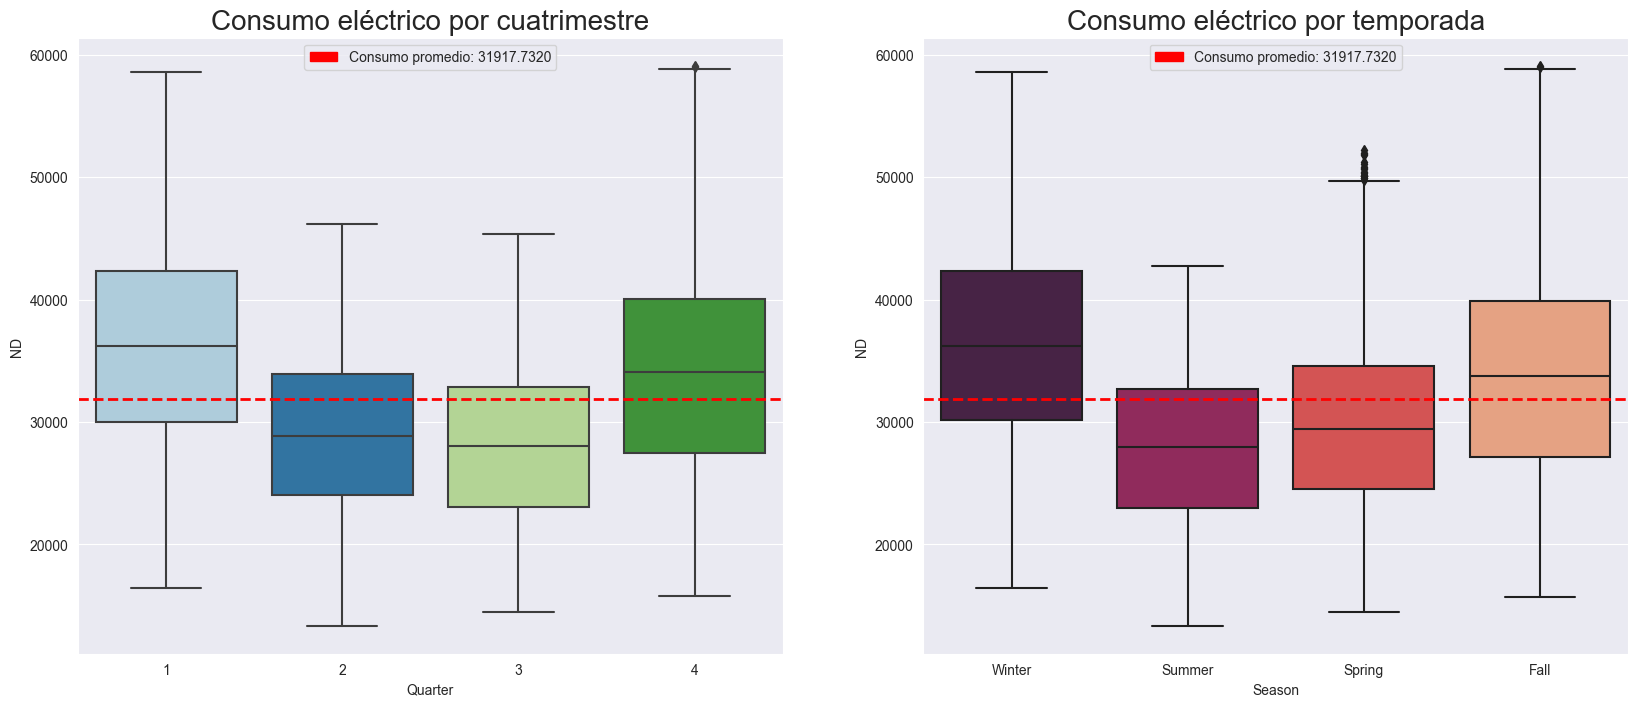

In [95]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=data, x='Quarter', y='ND', palette='Paired')
plt.axhline(nd_mean, color='red', linestyle='--', linewidth=2)
red_patch = mpatches.Patch(color='red', label='Consumo promedio: 31917.7320')
plt.legend(handles=[red_patch], loc='upper center')
plt.title('Consumo eléctrico por cuatrimestre', fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(data=data, x='Season', y='ND', palette='rocket')
plt.axhline(nd_mean, color='red', linestyle='--', linewidth=2)
red_patch = mpatches.Patch(color='red', label='Consumo promedio: 31917.7320')
plt.legend(handles=[red_patch], loc='upper center')
plt.title('Consumo eléctrico por temporada', fontsize=20)

plt.show()

<p align='center'> <img src='source/img/img_temp-graph.png'></img> <br> <img src='source/img/img_temp-table.png'></img></p>
<br>
<p align='center'>Fuente: <a>https://es.weatherspark.com/y/45062/Clima-promedio-en-Londres-Reino-Unido-durante-todo-el-a%C3%B1o</a></p>

Vemos que en el primer yúultimo cuatrimestre el la demanda se encuentra por encima de la media, mientras que en el segundo y tercer cuatrimestre se encuentra por debajo.
Esto tiene relación con el análisis anterior ya que al principio y al final de cada año la demanda es alta **(Otoño e invierno)**. En el caso opuesto, el segundo y tercer cuatrimestre, la demanda es baja **(Primavera y verano)**.

<br></br>
## **Consumo por año**

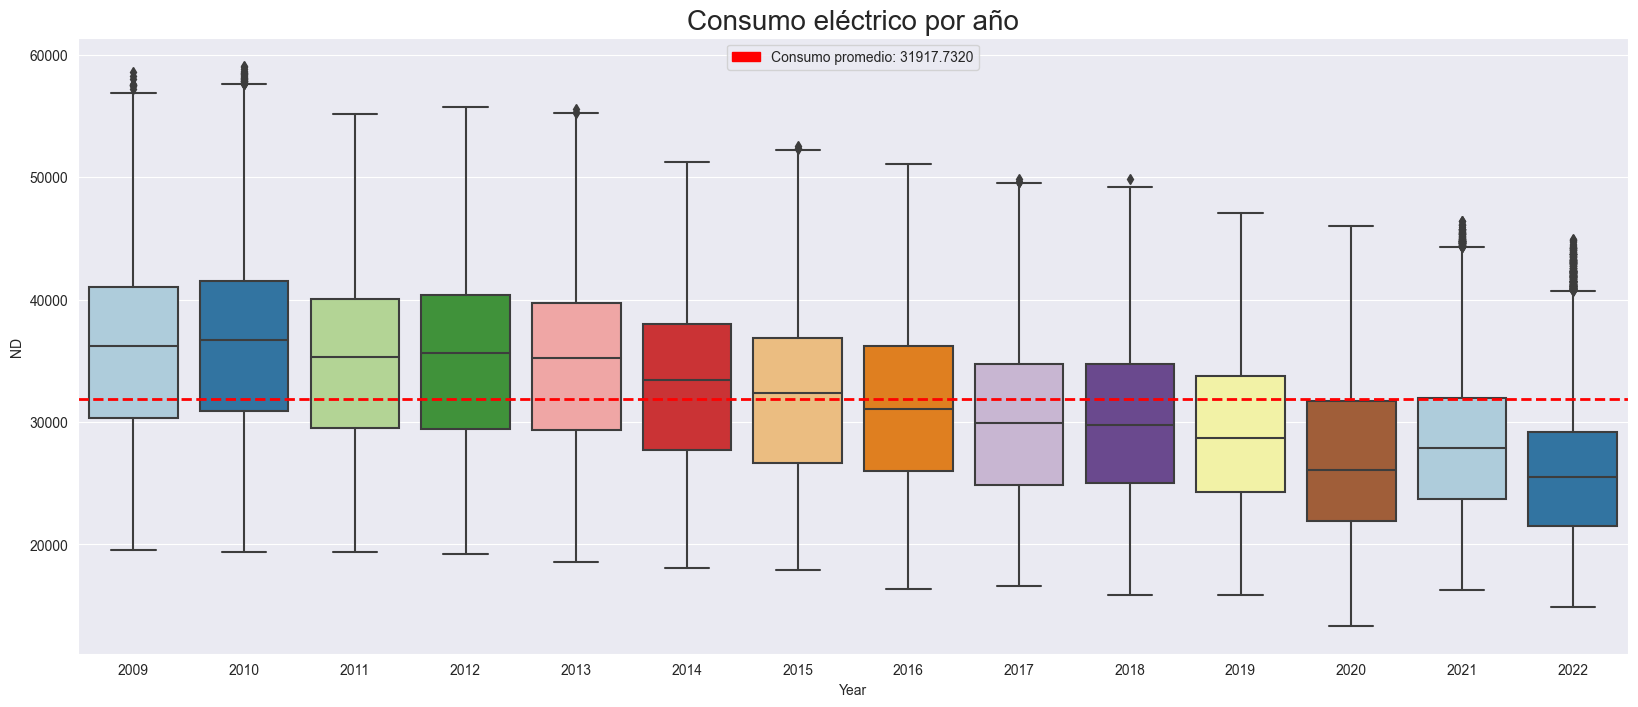

In [96]:
plt.figure(figsize=(20,8))
sns.boxplot(data=data, x='Year', y='ND', palette='Paired')
nd_mean = data.ND.mean()    # Cálculo de la media
plt.axhline(nd_mean, color='red', linestyle='--', linewidth=2)
red_patch = mpatches.Patch(color='red', label='Consumo promedio: 31917.7320')
plt.legend(handles=[red_patch], loc='upper center')
plt.title('Consumo eléctrico por año', fontsize=20)
plt.show()

<p align='center'><img src='source/img/img_pricehistory.png'></img></p>
<br>
<p align='center'>Fuente: <a>https://datosmacro.expansion.com/energia-y-medio-ambiente/electricidad-precio-hogares/uk</a></p>

Observemos que existe una cierta relación entre el consumo y el precio, ya que a medida que fue pasando el tiempo, el precio fue incrementando y el consumo se fue reduciendo a tal punto que hoy el consumo se encuentra muy por debajo de la media historica y el precio se encuentra en su punto máximo histórico.

<br></br>
## **Distribución del consumo**

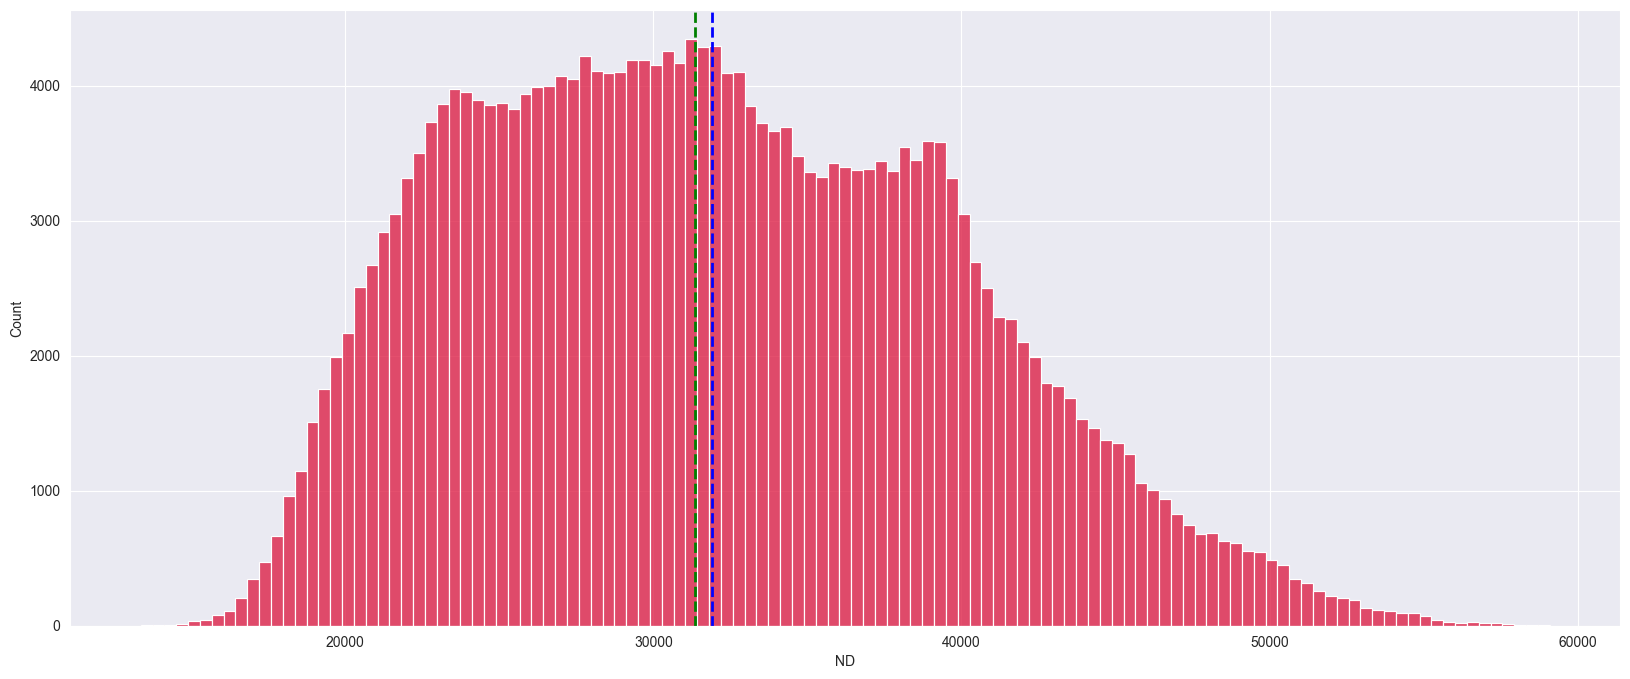

In [97]:
plt.figure(figsize=(20,8))
sns.histplot(data=data, x='ND', color='crimson')
plt.axvline(nd_mean, color='blue', linewidth=2, linestyle='--')
plt.axvline(data.ND.median(), color='green', linewidth=2, linestyle='--')
plt.show()